# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
print(f"Number of mice in the study: {number_of_mice}")

Number of mice in the study: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_rows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_rows.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_data["Mouse ID"].unique())
print(f"Number of mice in clean dataframe: {clean_mice_count}")

Number of mice in clean dataframe: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
var = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
std = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.
sum_stat = pd.DataFrame({"Mean":mean,"Median":median, "Variance":var, "Std. Dev.":std, "Std. Err.":sem})
sum_stat

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_grouped = combined_data.groupby("Drug Regimen")
agg_data = pd.DataFrame({"Mean":mean,"Median":median, "Variance":var, "Std. Dev.":std, "Std. Err.":sem})
agg_data

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
mice_per_drug = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

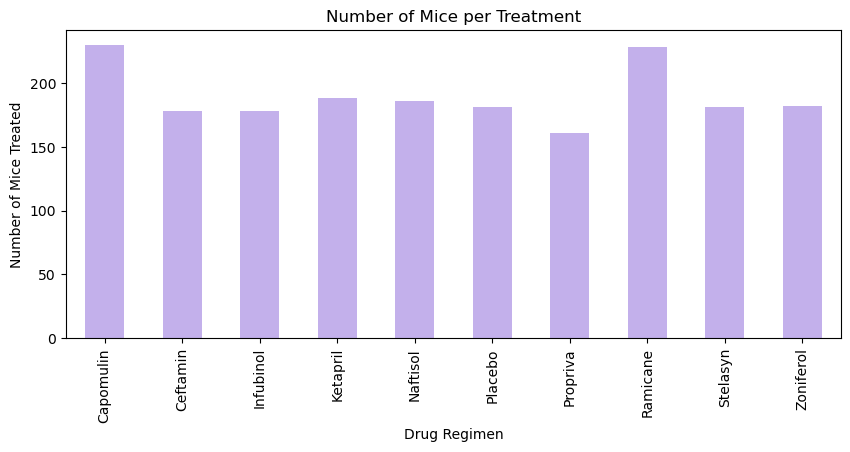

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
fig1 = mice_per_drug.plot(kind="bar", color="mediumpurple", figsize=(10,4), fontsize = 10, alpha = .55)
plt.title("Number of Mice per Treatment",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Treated",fontsize = 10)

plt.savefig("Images/pandas_bar_mice_per_treat.png")
plt.show()
plt.tight_layout()

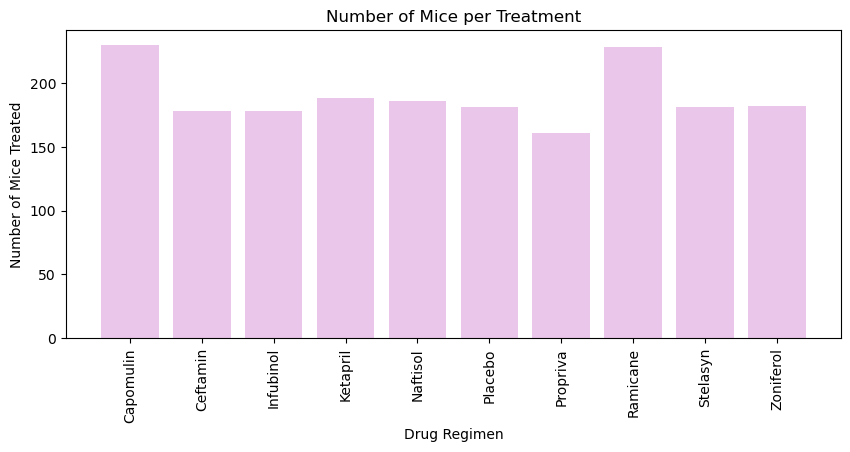

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
treatment_count = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_per_drug))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(10,4))


plt.xticks(tick_locations, mice_per_drug.index.values, rotation="vertical")
plt.bar(x_axis, treatment_count, color="plum", alpha=.60, align="center")
plt.title("Number of Mice per Treatment",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Treated",fontsize = 10)
plt.savefig("Images/pyplot_bar_mice_per_treat.png")

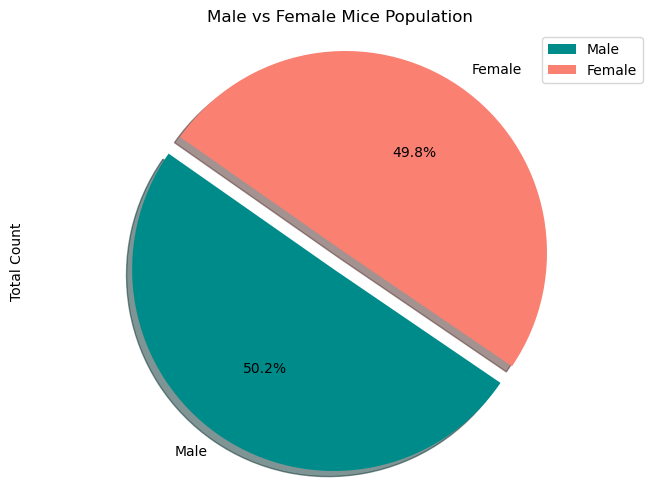

,Total Count
Sex,
Male,125
Female,124


In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Total count of mice based on gender
gender_rows = combined_data.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

# Create a dataframe for count and percentage of male and female mice
gender_data = pd.DataFrame({"Total Count": gender_count})

# Generate a pie plot showing the distribution of female versus male mice
colors = ["darkcyan", "salmon"]
explode = (0.1, 0)
#not sure why I was having such a hardtime with plt.pie, however this way also works with pandas to graph
pandas_pie = gender_data.plot(kind="pie", figsize=(8,6), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=145, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.savefig("Images/pandas_pie_male_vs_female.png")
plt.show()

gender_data

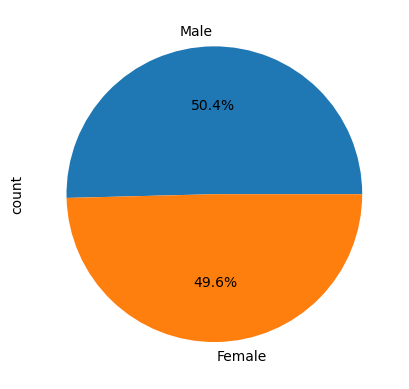

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


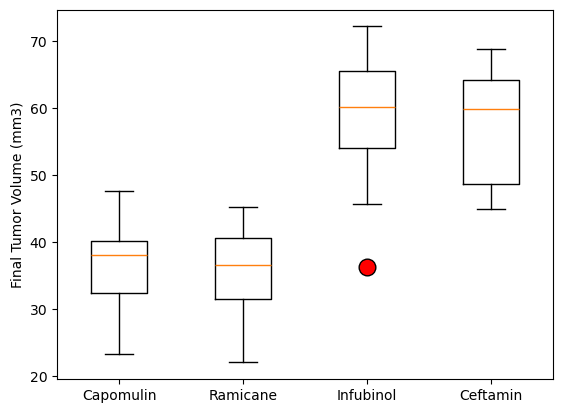

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

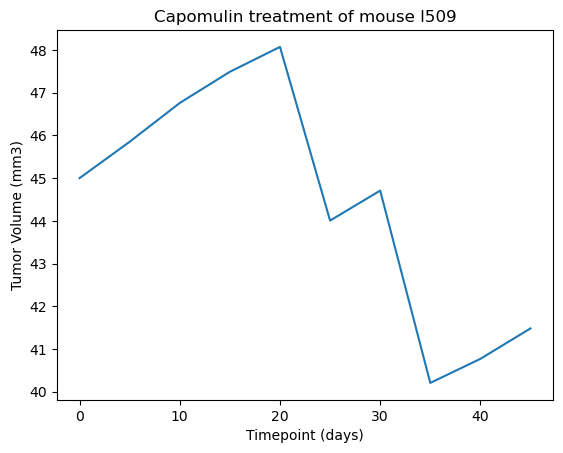

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


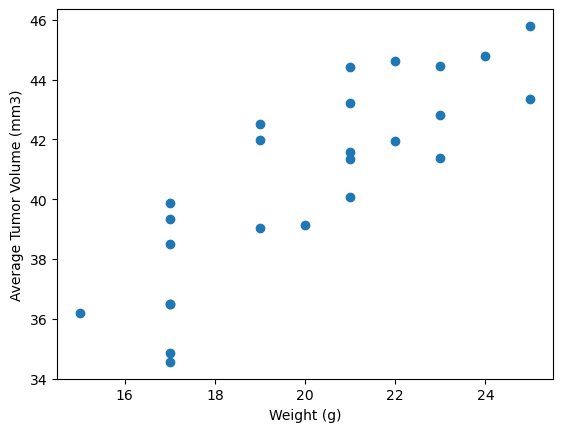

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


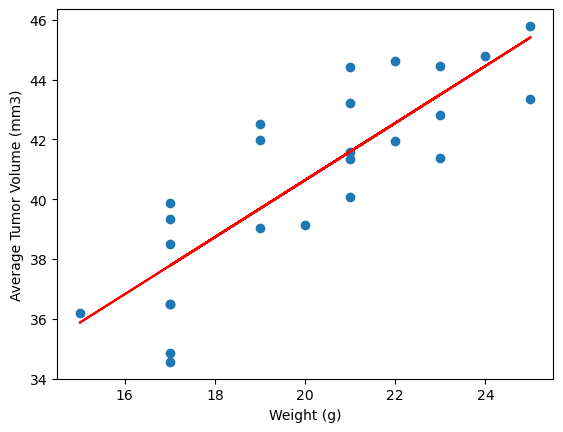

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
